In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
data = pd.read_csv('insurance.csv')

In [55]:
data.shape

(1338, 7)

In [56]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [57]:
print(data.duplicated().sum())

1


In [58]:
data.loc[data.duplicated(keep=False), :]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [59]:
data=data.drop_duplicates().reset_index(drop=True)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [60]:
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


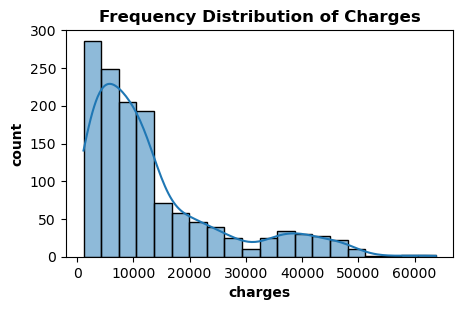

In [44]:
plt.rcParams.update({'figure.figsize': (5, 3), 'figure.dpi': 100})
sns.histplot(data['charges'], bins=20, kde=True)
plt.ylabel('count', fontsize=10, fontweight='bold')
plt.xlabel('charges', fontsize=10, fontweight='bold')
plt.title('Frequency Distribution of Charges', 
            fontsize=12, fontweight='bold')
plt.show()

In [64]:
data_75th_q = data[data['charges']>data.charges.quantile(0.75)]
data_75th_q.reset_index(inplace=True)
data_75th_q.describe()

,index,age,bmi,children,charges
count,334.000000,334.000000,334.000000,334.000000,334.000000
mean,665.383234,40.221557,31.337186,1.179641,31151.710338
std,396.780190,13.824686,5.828231,1.166630,10581.240592
min,0.000000,18.000000,17.765000,0.000000,16776.304050
25%,302.000000,28.000000,27.141250,0.000000,21345.811525
50%,663.500000,42.000000,30.960000,1.000000,28936.803060
75%,1020.750000,52.000000,35.530000,2.000000,39727.090013
max,1336.000000,64.000000,52.580000,5.000000,63770.428010


In [65]:
data_75th_q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     334 non-null    int64  
 1   age       334 non-null    int64  
 2   sex       334 non-null    object 
 3   bmi       334 non-null    float64
 4   children  334 non-null    int64  
 5   smoker    334 non-null    object 
 6   region    334 non-null    object 
 7   charges   334 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 21.0+ KB


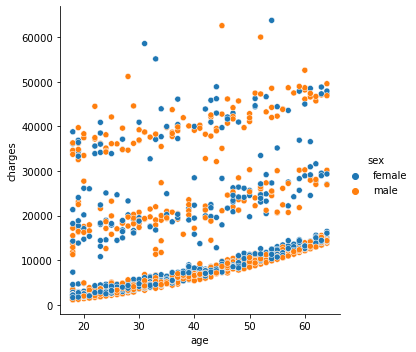

In [33]:
sns.relplot(x='age', y='charges', hue='sex', data=data)

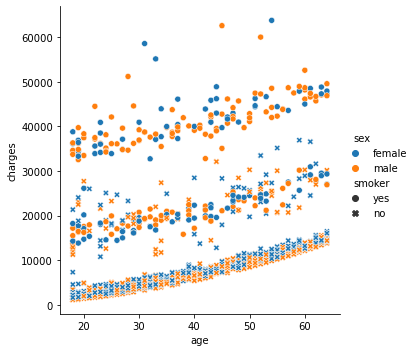

In [36]:
sns.relplot(x='age', y='charges', hue='sex', style='smoker', data=data)

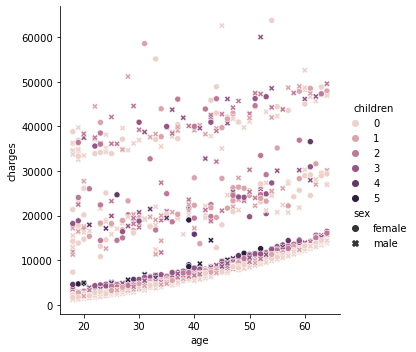

In [38]:
sns.relplot(x='age', y='charges', style='sex', hue='children', data=data)

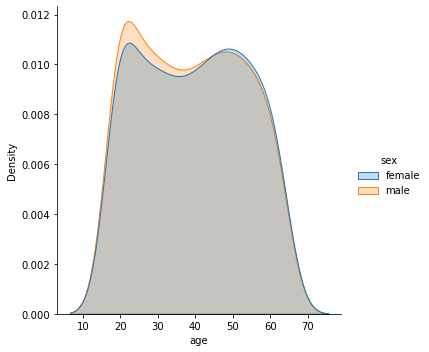

In [31]:
import seaborn as sns
sns.displot(data, x='age', hue='sex', kind = 'kde', fill=True)

In [16]:
data.groupby(['sex', 'smoker', 'children'])['charges'].mean()

sex     smoker  children
female  no      0            7688.318863
                1            8758.560884
                2            9921.777645
                3           10128.716357
                4           13937.674562
                5            8544.113050
        yes     0           30685.059887
                1           30264.253915
                2           31663.833195
                3           30681.604257
                5           19023.260000
male    no      0            7530.806677
                1            7837.147396
                2            9020.567024
                3            9025.530139
                4           10305.014255
                5            7931.658310
        yes     0           31902.398075
                1           32904.876848
                2           35297.837461
                3           33869.169434
                4           26532.276933
Name: charges, dtype: float64